In [3]:
import itertools
import urllib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import csv
from pandas import read_csv
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

%matplotlib inline

In [4]:
df = pd.read_csv("https://media.githubusercontent.com/media/tayher2679/Github/main/train.csv")
df.head().T

,0,1,2,3,4
UniqueID,420825,537409,417566,624493,539055
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
branch_id,67,67,67,67,67
supplier_id,22807,22807,22807,22807,22807
manufacturer_id,45,45,45,45,45
Current_pincode_ID,1441,1502,1497,1501,1495
Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed


In [5]:
df.shape

(233154, 41)

In [6]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
dftitle=pd.read_csv("https://media.githubusercontent.com/media/tayher2679/Github/3a342842df53002d6b17bfcee99e60a6f096c9ce/data_dictionary.csv")
dftitle

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


<AxesSubplot:>

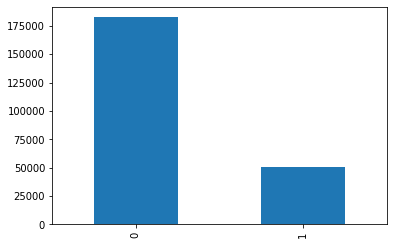

In [8]:
df.loan_default.value_counts().plot(kind='bar')

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,NaN,NaN,NaN,535917.573376,68315.693711,417428.0,476786.25,535978.5,595039.75,671084.0
disbursed_amount,233154.0,NaN,NaN,NaN,54356.993528,12971.314171,13320.0,47145.0,53803.0,60413.0,990572.0
asset_cost,233154.0,NaN,NaN,NaN,75865.068144,18944.781289,37000.0,65717.0,70946.0,79201.75,1628992.0
ltv,233154.0,NaN,NaN,NaN,74.74653,11.456636,10.03,68.88,76.8,83.67,95.0
branch_id,233154.0,NaN,NaN,NaN,72.936094,69.834995,1.0,14.0,61.0,130.0,261.0
supplier_id,233154.0,NaN,NaN,NaN,19638.635035,3491.949566,10524.0,16535.0,20333.0,23000.0,24803.0
manufacturer_id,233154.0,NaN,NaN,NaN,69.028054,22.141304,45.0,48.0,86.0,86.0,156.0
Current_pincode_ID,233154.0,NaN,NaN,NaN,3396.880247,2238.147502,1.0,1511.0,2970.0,5677.0,7345.0
Date.of.Birth,233154,15433,01-01-88,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment.Type,225493,2,Self employed,127635,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [11]:
#Note we will need to convert object type variables to category/numbers= Date of Birth, Employment Type, Disbursal Date, Perform CNS Score description, Average Acct Age and Credit history length

In [12]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [13]:
dfemploy1=df['Employment.Type'].fillna('Not declared', inplace=True)

<AxesSubplot:xlabel='Employment.Type'>

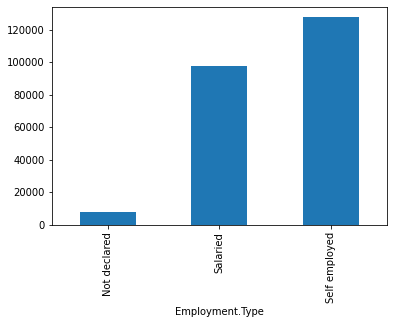

In [14]:
dfemploy1=df.groupby(['Employment.Type'])['loan_default'].count()
dfemploy1.plot(kind='bar')

In [15]:
#seems like the non-declared employment can be factor in loan delinquencies. So cannot ignore as a factor. 
df['Employment.Type'].fillna('Not declared')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [16]:
# finding information value

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [17]:

df1 = df.drop('loan_default',axis=1)

In [18]:
final_iv, IV = data_vars(df1,df.loan_default)

C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
IV.sort_values('IV')

,VAR_NAME,IV
10,MobileNo_Avl_Flag,0.000000
38,manufacturer_id,0.000008
29,SEC.OVERDUE.ACCTS,0.000023
13,PAN_flag,0.000025
22,PRIMARY.INSTAL.AMT,0.000193
7,Driving_flag,0.000205
24,SEC.ACTIVE.ACCTS,0.000273
27,SEC.INSTAL.AMT,0.000277
23,Passport_flag,0.000390
25,SEC.CURRENT.BALANCE,0.000405


In [20]:
# We can see that lots of the ID data has very low Information value <0.01 (except State_ID, Vote ID) and can be dropped off 

df = df.drop(['UniqueID','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Employee_code_ID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   Date.of.Birth                        233154 non-null  object 
 4   Employment.Type                      233154 non-null  object 
 5   DisbursalDate                        233154 non-null  object 
 6   State_ID                             233154 non-null  int64  
 7   MobileNo_Avl_Flag                    233154 non-null  int64  
 8   Aadhar_flag                          233154 non-null  int64  
 9   PAN_flag                             233154 non-null  int64  
 10  VoterID_flag                         233154 non-null  int64  
 11  Driving_flag 

In [21]:
#converting object datatype into appropriate datatype

df['Employment.Type'] = df['Employment.Type'].astype('category')
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category')

def dateconv(x,format):
    year = pd.datetime.today().year
    dob = pd.to_datetime(x,format = format)
    dob.loc[dob.dt.year.gt(year)] -= pd.DateOffset(years=100)
    return dob

df['Date.of.Birth'] = dateconv(df['Date.of.Birth'], '%d-%m-%y')
df['DisbursalDate'] = dateconv(df['DisbursalDate'], '%d-%m-%y')

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)


C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   disbursed_amount                     233154 non-null  int64         
 1   asset_cost                           233154 non-null  int64         
 2   ltv                                  233154 non-null  float64       
 3   Date.of.Birth                        233154 non-null  datetime64[ns]
 4   Employment.Type                      233154 non-null  category      
 5   DisbursalDate                        233154 non-null  datetime64[ns]
 6   State_ID                             233154 non-null  int64         
 7   MobileNo_Avl_Flag                    233154 non-null  int64         
 8   Aadhar_flag                          233154 non-null  int64         
 9   PAN_flag                             233154 non-null  int64         
 

In [23]:
df.head().T

,0,1,2,3,4
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
Date.of.Birth,1984-01-01 00:00:00,1985-07-31 00:00:00,1985-08-24 00:00:00,1993-12-30 00:00:00,1977-12-09 00:00:00
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00
State_ID,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1
Aadhar_flag,1,1,1,1,1
PAN_flag,0,0,0,0,0


In [24]:
df.describe(include="all").T

C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,NaN,NaN,NaN,NaT,NaT,54356.993528,12971.314171,13320.0,47145.0,53803.0,60413.0,990572.0
asset_cost,233154.0,NaN,NaN,NaN,NaT,NaT,75865.068144,18944.781289,37000.0,65717.0,70946.0,79201.75,1628992.0
ltv,233154.0,NaN,NaN,NaN,NaT,NaT,74.74653,11.456636,10.03,68.88,76.8,83.67,95.0
Date.of.Birth,233154,15433,1988-01-01 00:00:00,2173,1949-09-15,2000-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment.Type,233154,3,Self employed,127635,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisbursalDate,233154,84,2018-10-31 00:00:00,8826,2018-08-01,2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_ID,233154.0,NaN,NaN,NaN,NaT,NaT,7.262243,4.48223,1.0,4.0,6.0,10.0,22.0
MobileNo_Avl_Flag,233154.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Aadhar_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.84032,0.36631,0.0,1.0,1.0,1.0,1.0
PAN_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.075577,0.26432,0.0,0.0,0.0,0.0,1.0


In [25]:
#covert DOB to age
import datetime
def age(born):
    thedate='2018-12-31'
    thedate = datetime.datetime.strptime(thedate, '%Y-%m-%d')
    return thedate.year - born.year - ((thedate.month, 
                                      thedate.day) < (born.month, 
                                                    born.day))
  
df['Age'] = df['Date.of.Birth'].apply(age)
df.head().T

,0,1,2,3,4
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
Date.of.Birth,1984-01-01 00:00:00,1985-07-31 00:00:00,1985-08-24 00:00:00,1993-12-30 00:00:00,1977-12-09 00:00:00
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00
State_ID,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1
Aadhar_flag,1,1,1,1,1
PAN_flag,0,0,0,0,0


In [26]:
df=df.drop(['Date.of.Birth'],axis=1)

In [27]:
df.head().T

,0,1,2,3,4
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00
State_ID,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1
Aadhar_flag,1,1,1,1,1
PAN_flag,0,0,0,0,0
VoterID_flag,0,0,0,0,0


In [28]:
#MOve Age to the front of the data
age = df['Age']
df = df.drop(columns=['Age'])
df.insert(loc=3, column='Age', value=age)
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603,53278,64769,53278,49478,49278,47549,57713,53503,70017,58259
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300,61230,74190,61330,57010,57080,61400,65750,62100,86760,68500
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95,89.83,89.23,89.68,89.46,89.35,79.8,89.28,87.28,82.99,86.13
Age,34,33,33,25,41,28,30,29,27,50,39,34,44,34,45,24,42,35,30,38
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried,Self employed,Salaried,Salaried,Salaried,Self employed,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00,2018-09-29 00:00:00,2018-09-03 00:00:00,2018-08-30 00:00:00,2018-08-30 00:00:00,2018-08-31 00:00:00,2018-10-22 00:00:00,2018-09-18 00:00:00,2018-09-20 00:00:00,2018-09-06 00:00:00,2018-10-11 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1
PAN_flag,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlations between variables')

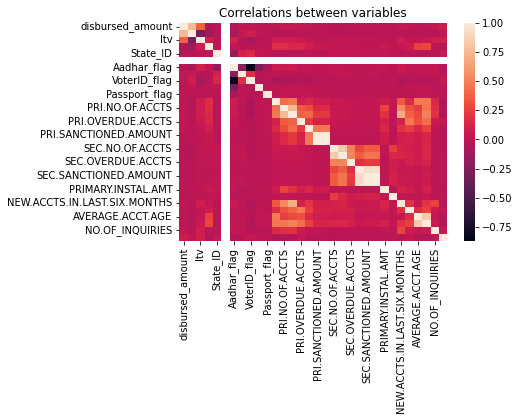

In [29]:
corr = df.corr()
sns.heatmap(corr)
plt.title('Correlations between variables')

In [30]:
#check what is Perform_CNS_SCORE
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [103]:
#change it to number category

Text(0.5, 1.0, 'CNS Score BoxPlot')

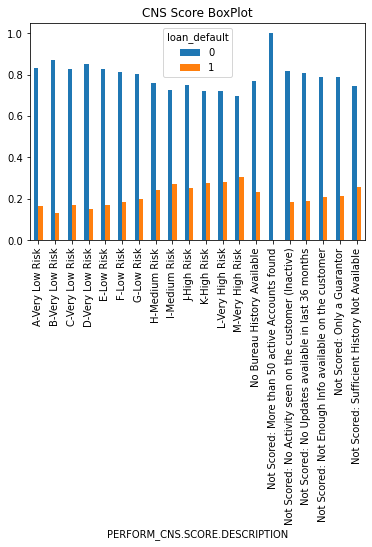

In [31]:
score_default= pd.crosstab(df['PERFORM_CNS.SCORE.DESCRIPTION'],df['loan_default'],normalize='index')
score_default.plot.bar()
plt.title('CNS Score BoxPlot')

In [32]:
def replace_not_scored(n):
    score=n.split("-")
    
    if len(score)!=1:
        return score[0]
    else:
        return 'N'

def transform_CNS_Description(data):
    data['CNS.SCORE.DESCRIPTOR']=data['PERFORM_CNS.SCORE.DESCRIPTION'].apply(replace_not_scored).astype(np.object)
    
    #Now Transform CNS Score Description data into Numbers

    sub_risk = {'N':0, 'C':1, 'A':1, 'D':1, 'B':1, 'F':2, 'E':2,'G':2, 'H':3, 'I':3, 'K':4, 'J':4, 'L':5, 'M':5}

    data['CNS.SCORE.DESCRIPTOR'] = data['CNS.SCORE.DESCRIPTOR'].apply(lambda x: sub_risk[x])
    

In [33]:
transform_CNS_Description(df)

C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [34]:
df.head().T

,0,1,2,3,4
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
Age,34,33,33,25,41
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00
State_ID,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1
Aadhar_flag,1,1,1,1,1
PAN_flag,0,0,0,0,0


In [35]:
df = df.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION'])

In [36]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


In [37]:
#MOve CNS Score Descriptor next to CNS Score 
CNS = df['CNS.SCORE.DESCRIPTOR']
df = df.drop(columns=['CNS.SCORE.DESCRIPTOR'])
df.insert(loc=13, column='CNS.SCORE.DESCRIPTOR', value=CNS)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


In [38]:
df.describe(include="all").T

C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,NaN,NaN,NaN,NaT,NaT,54356.993528,12971.314171,13320.0,47145.0,53803.0,60413.0,990572.0
asset_cost,233154.0,NaN,NaN,NaN,NaT,NaT,75865.068144,18944.781289,37000.0,65717.0,70946.0,79201.75,1628992.0
ltv,233154.0,NaN,NaN,NaN,NaT,NaT,74.74653,11.456636,10.03,68.88,76.8,83.67,95.0
Age,233154.0,NaN,NaN,NaN,NaT,NaT,34.100946,9.805992,18.0,26.0,32.0,41.0,69.0
Employment.Type,233154,3,Self employed,127635,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisbursalDate,233154,84,2018-10-31 00:00:00,8826,2018-08-01,2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_ID,233154.0,NaN,NaN,NaN,NaT,NaT,7.262243,4.48223,1.0,4.0,6.0,10.0,22.0
MobileNo_Avl_Flag,233154.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Aadhar_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.84032,0.36631,0.0,1.0,1.0,1.0,1.0
PAN_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.075577,0.26432,0.0,0.0,0.0,0.0,1.0


In [39]:
#looks like CNS.Score and CNS.SCore descriptor could have a correlated relationship. Check whether we can drop one of the feature

from scipy.stats.stats import pearsonr

x=df['CNS.SCORE.DESCRIPTOR']
y=df['PERFORM_CNS.SCORE']
corr, p = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr, 'p=value:%.4f'% p)




Pearsons correlation: 0.533 p=value:0.0000


In [40]:
#looks like both of features are strongly correlated, with low p-value. So we can drop one of the feature off. Drop CNS.SCORE
df = df.drop(columns=['PERFORM_CNS.SCORE'])
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

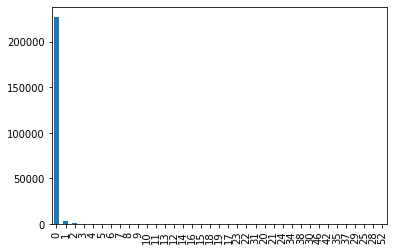

In [41]:
#evaluate whether the seconday accounts information is vital. Looks like its mostly 0 with some outlier
df['SEC.NO.OF.ACCTS'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'BoxPlot')

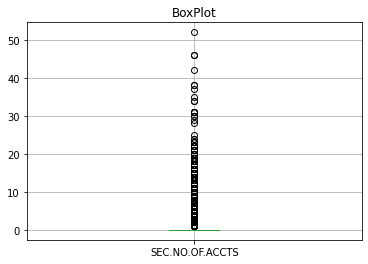

In [42]:
df.boxplot('SEC.NO.OF.ACCTS')
plt.title('BoxPlot')

In [43]:
#how many have 1 or more than 1 secondary accounts, and whether it has impact to loan default?
secondary=df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

In [44]:
secondary['SEC.NO.OF.ACCTS'].value_counts()

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
14        11
16        11
15        10
18         6
19         6
17         5
23         4
22         4
31         4
20         4
21         3
24         2
34         2
38         2
30         2
46         2
42         1
35         1
37         1
29         1
25         1
28         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

In [45]:
secondary.describe()

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03
std,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05
min,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07


In [46]:
#looks like secondary only a minority , with only 2.5% have more than 1 secondary account. Will combine it into the primary accounts

df.loc[:,'T.No.of.Accts']=df['PRI.NO.OF.ACCTS']+df['SEC.NO.OF.ACCTS']
df.loc[:,'Pri.Inactive.Accts']=df['PRI.NO.OF.ACCTS']-df['PRI.ACTIVE.ACCTS']
df.loc[:,'Sec.Inactive.Accts']=df['SEC.NO.OF.ACCTS']-df['SEC.ACTIVE.ACCTS']
df.loc[:,'T.Inactive.Accts']=df['Pri.Inactive.Accts']+df['Sec.Inactive.Accts']
df.loc[:,'T.Overdue.Accts']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df.loc[:,'T.Current.Balance']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df.loc[:,'T.Disbursed.Amount']=df['PRI.DISBURSED.AMOUNT']+df['SEC.CURRENT.BALANCE']
df.loc[:,'T.Sanctioned.Amount']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df.loc[:,'T.Installment']=df['PRIMARY.INSTAL.AMT']+df['SEC.SANCTIONED.AMOUNT']



In [47]:
df.describe(include="all").T

C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,NaN,NaN,NaN,NaT,NaT,54356.993528,12971.314171,13320.0,47145.0,53803.0,60413.0,990572.0
asset_cost,233154.0,NaN,NaN,NaN,NaT,NaT,75865.068144,18944.781289,37000.0,65717.0,70946.0,79201.75,1628992.0
ltv,233154.0,NaN,NaN,NaN,NaT,NaT,74.74653,11.456636,10.03,68.88,76.8,83.67,95.0
Age,233154.0,NaN,NaN,NaN,NaT,NaT,34.100946,9.805992,18.0,26.0,32.0,41.0,69.0
Employment.Type,233154,3,Self employed,127635,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DisbursalDate,233154,84,2018-10-31 00:00:00,8826,2018-08-01,2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_ID,233154.0,NaN,NaN,NaN,NaT,NaT,7.262243,4.48223,1.0,4.0,6.0,10.0,22.0
MobileNo_Avl_Flag,233154.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Aadhar_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.84032,0.36631,0.0,1.0,1.0,1.0,1.0
PAN_flag,233154.0,NaN,NaN,NaN,NaT,NaT,0.075577,0.26432,0.0,0.0,0.0,0.0,1.0


In [48]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


In [49]:
df=df.drop(['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT'],axis=1)

In [50]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


In [51]:
df=df.drop(['Pri.Inactive.Accts','Sec.Inactive.Accts'],axis=1)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
MobileNo_Avl_Flag,1,1,1,1,1,1,1,1,1,1
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0


In [52]:
#check all t he FLags has how many unique outcome
flag=df[['MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']]
print(flag.nunique())

MobileNo_Avl_Flag    1
Aadhar_flag          2
PAN_flag             2
VoterID_flag         2
Driving_flag         2
Passport_flag        2
dtype: int64


In [53]:
#Mobile No. Avl Flag doesn't seem to offer any insight. Can drop this colum
df=df.drop(columns=['MobileNo_Avl_Flag'])

In [138]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
Aadhar_flag,1,1,1,1,1,1,1,1,1,0
PAN_flag,0,0,0,0,0,0,0,0,0,0
VoterID_flag,0,0,0,0,0,0,0,0,0,1


In [54]:
print(df['State_ID'].nunique())

22


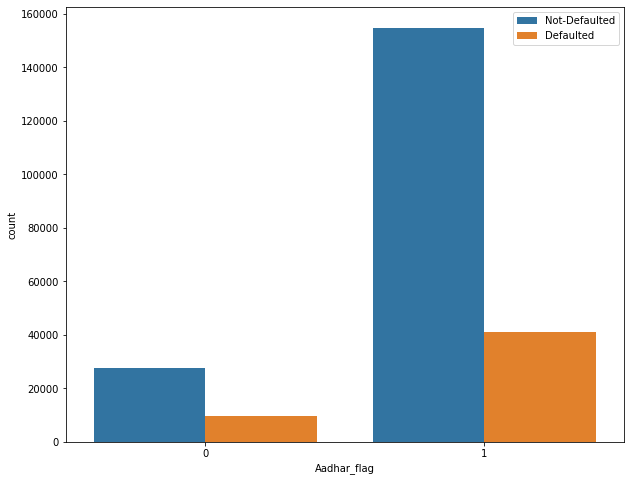

In [55]:
#check the rest of the flag whether they offer any statistically signifcant insights

plt.figure(figsize=(10,8))
sns.countplot(x='Aadhar_flag',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

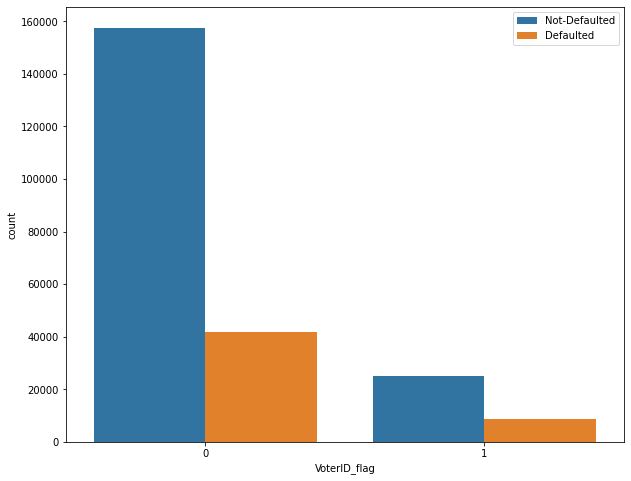

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x='VoterID_flag',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

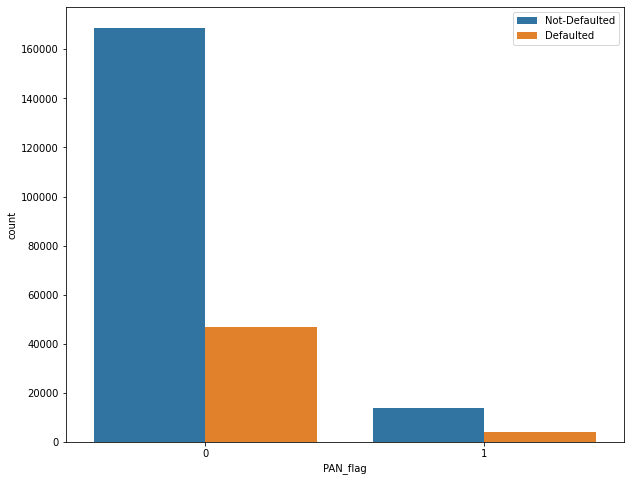

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(x='PAN_flag',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

In [ ]:
# Initial check doens't look like it offers any statistic significance. Will evaluate futher using chi-square and IV

In [58]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
flag1=df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']]
for i in flag1:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: Aadhar_flag
Chi Square Statistics 403.0748379341479
p-value 1.1791998402218374e-89
Degree of freedom 1

Feature: PAN_flag
Chi Square Statistics 0.957671117865875
p-value 0.3277743362589148
Degree of freedom 1

Feature: VoterID_flag
Chi Square Statistics 445.90884255981064
p-value 5.603683381655361e-99
Degree of freedom 1

Feature: Driving_flag
Chi Square Statistics 7.808087835127649
p-value 0.0052012912081583085
Degree of freedom 1

Feature: Passport_flag
Chi Square Statistics 13.077913022819462
p-value 0.0002987981770071958
Degree of freedom 1



In [59]:
#check information value for these flags to loan default status

final_iv, IV = data_vars(flag1,df.loan_default)
IV.sort_values('IV')

,VAR_NAME,IV
2,PAN_flag,0.000025
1,Driving_flag,0.000205
3,Passport_flag,0.000390
0,Aadhar_flag,0.009706
4,VoterID_flag,0.010671


In [60]:
# Seems like PAN_flag p-value is >0.05, so may be independant and does not have impact to default Status. the rest of the flag has very low IV apart from Voter ID,so will keep VoterID but drop the rest
df=df.drop(columns=['Aadhar_flag',  'PAN_flag', 'Driving_flag', 'Passport_flag'])
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed,Self employed,Salaried,Salaried,Self employed,Salaried
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
VoterID_flag,0,0,0,0,0,0,0,0,0,1
CNS.SCORE.DESCRIPTOR,0,3,0,5,0,1,0,0,1,1
NEW.ACCTS.IN.LAST.SIX.MONTHS,0,0,0,0,0,0,0,0,0,0


In [61]:
#change category into numberics for Employemnt type
df['Employment.Type'].replace(to_replace=['Salaried','Self employed','Not declared'], value=[2,1,0],inplace=True)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
disbursed_amount,50578,47145,53278,57513,52378,54513,46349,43894,53713,52603
asset_cost,58400,65550,61360,66113,60300,61900,61500,61900,61973,61300
ltv,89.55,73.23,89.63,88.48,88.39,89.66,76.42,71.89,89.56,86.95
Age,34,33,33,25,41,28,30,29,27,50
Employment.Type,2,1,1,1,1,1,2,2,1,2
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00,2018-09-19 00:00:00,2018-09-23 00:00:00,2018-09-16 00:00:00,2018-09-05 00:00:00,2018-09-16 00:00:00
State_ID,6,6,6,6,6,6,6,6,6,6
VoterID_flag,0,0,0,0,0,0,0,0,0,1
CNS.SCORE.DESCRIPTOR,0,3,0,5,0,1,0,0,1,1
NEW.ACCTS.IN.LAST.SIX.MONTHS,0,0,0,0,0,0,0,0,0,0


In [62]:
#covert Disbursal Date to Disbursed duration

def disburse(start):
    thedate='2018-12-31'
    thedate = datetime.datetime.strptime(thedate, '%Y-%m-%d')
    return (thedate.year - start.year)*12+(thedate.month-start.month) 
  
df['DisburseDur'] = df['DisbursalDate'].apply(disburse)
df.head().T

,0,1,2,3,4
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
Age,34,33,33,25,41
Employment.Type,2,1,1,1,1
DisbursalDate,2018-08-03 00:00:00,2018-09-26 00:00:00,2018-08-01 00:00:00,2018-10-26 00:00:00,2018-09-26 00:00:00
State_ID,6,6,6,6,6
VoterID_flag,0,0,0,0,0
CNS.SCORE.DESCRIPTOR,0,3,0,5,0
NEW.ACCTS.IN.LAST.SIX.MONTHS,0,0,0,0,0


In [63]:
df=df.drop(columns=['DisbursalDate'])
df.head().T

,0,1,2,3,4
disbursed_amount,50578.00,47145.00,53278.00,57513.00,52378.00
asset_cost,58400.00,65550.00,61360.00,66113.00,60300.00
ltv,89.55,73.23,89.63,88.48,88.39
Age,34.00,33.00,33.00,25.00,41.00
Employment.Type,2.00,1.00,1.00,1.00,1.00
State_ID,6.00,6.00,6.00,6.00,6.00
VoterID_flag,0.00,0.00,0.00,0.00,0.00
CNS.SCORE.DESCRIPTOR,0.00,3.00,0.00,5.00,0.00
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.00,0.00,0.00,0.00,0.00
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.00,1.00,0.00,0.00,0.00


In [65]:
#time to normalize the data and split to test/train data
X=df.drop('loan_default',axis=1)
y=df['loan_default']

X.head(10).T
y.head(10).T

0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: loan_default, dtype: int64

In [75]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
Xstd=preprocessing.StandardScaler().fit(X).transform(X)
X1=pd.DataFrame(Xstd)
X1.columns=X.columns
X1.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
disbursed_amount,-0.291335,-0.555997,-0.083183,0.243307,-0.152567,0.012027,-0.617363,-0.806627,-0.049648,-0.135221,-0.083183,0.802697,-0.083183,-0.376138,-0.391557,-0.524851,0.258726,-0.065837,1.207282,0.300819
asset_cost,-0.921895,-0.544482,-0.765651,-0.514764,-0.821604,-0.737147,-0.758262,-0.737147,-0.733294,-0.768819,-0.772514,-0.088419,-0.767235,-0.995267,-0.991572,-0.763540,-0.533925,-0.726590,0.575090,-0.388766
ltv,1.292133,-0.132372,1.299116,1.198738,1.190882,1.301735,0.146070,-0.249335,1.293006,1.065190,1.316573,1.264202,1.303481,1.284278,1.274676,0.441096,1.268566,1.093995,0.719538,0.993616
Age,-0.010294,-0.112273,-0.112273,-0.928103,0.703556,-0.622166,-0.418209,-0.520188,-0.724145,1.621365,0.499599,-0.010294,1.009492,-0.010294,1.111471,-1.030081,0.805535,0.091684,-0.418209,0.397620
Employment.Type,1.114044,-0.702893,-0.702893,-0.702893,-0.702893,-0.702893,1.114044,1.114044,-0.702893,1.114044,-0.702893,1.114044,1.114044,1.114044,-0.702893,1.114044,-0.702893,-0.702893,-0.702893,-0.702893
State_ID,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611,-0.281611
VoterID_flag,-0.411719,-0.411719,-0.411719,-0.411719,-0.411719,-0.411719,-0.411719,-0.411719,-0.411719,2.428842,-0.411719,-0.411719,2.428842,-0.411719,-0.411719,2.428842,-0.411719,-0.411719,2.428842,-0.411719
CNS.SCORE.DESCRIPTOR,-0.675567,1.451028,-0.675567,2.868758,-0.675567,0.033298,-0.675567,-0.675567,0.033298,0.033298,2.868758,0.033298,2.868758,0.033298,2.868758,-0.675567,2.868758,0.742163,1.451028,1.451028
NEW.ACCTS.IN.LAST.SIX.MONTHS,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,-0.399782,0.647224,-0.399782,0.647224,0.647224,0.647224,-0.399782,-0.399782
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,-0.253566,2.347632,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,-0.253566,2.347632,-0.253566,-0.253566,-0.253566


In [76]:
# Check each feauture for Chisquared and IV
featurecheck=X1
for i in featurecheck:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],y))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: disbursed_amount
Chi Square Statistics 28554.440633546626
p-value 5.771384285446102e-66
Degree of freedom 24564

Feature: asset_cost
Chi Square Statistics 50081.27434775807
p-value 7.055079035755139e-35
Degree of freedom 46251

Feature: ltv
Chi Square Statistics 8335.49120686744
p-value 1.0253193375667695e-45
Degree of freedom 6578

Feature: Age
Chi Square Statistics 419.6805663861613
p-value 2.689890393878496e-61
Degree of freedom 47

Feature: Employment.Type
Chi Square Statistics 191.1398528340361
p-value 3.1225422343284505e-42
Degree of freedom 2

Feature: State_ID
Chi Square Statistics 1626.8617814468685
p-value 0.0
Degree of freedom 21

Feature: VoterID_flag
Chi Square Statistics 445.90884255981064
p-value 5.603683381655361e-99
Degree of freedom 1

Feature: CNS.SCORE.DESCRIPTOR
Chi Square Statistics 2005.9434027466132
p-value 0.0
Degree of freedom 5

Feature: NEW.ACCTS.IN.LAST.SIX.MONTHS
Chi Square Statistics 287.0409429193801
p-value 2.366614253991536e-46
Degree of freed

In [77]:
final_iv, IV = data_vars(X1,y)
IV.sort_values('IV')

,VAR_NAME,IV
5,DisburseDur,0.000028
18,asset_cost,0.001707
13,T.Installment,0.003481
10,T.Current.Balance,0.003874
11,T.Disbursed.Amount,0.004520
6,Employment.Type,0.004674
7,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.006831
4,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.007903
0,AVERAGE.ACCT.AGE,0.008399
8,NO.OF_INQUIRIES,0.008588


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, f_regression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.datasets import make_classification
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split( X1, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (163207, 21) (163207,)
Test set: (69947, 21) (69947,)


In [189]:
#feature sselection- first using  Select KBest

fs1=SelectKBest(score_func=f_regression, k='all')
fs1.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000002230D6EB678>)

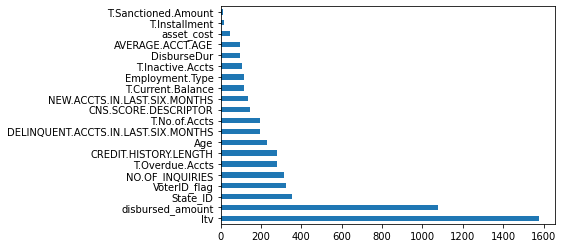

In [190]:
feat_selection= pd.Series(fs1.scores_, index=X_train.columns)
feat_selection.nlargest(20).plot(kind='barh')
plt.show()

In [191]:
feat_selection.nlargest(20)

ltv                                    1579.320056
disbursed_amount                       1078.309811
State_ID                                352.784041
VoterID_flag                            325.625363
NO.OF_INQUIRIES                         315.619521
T.Overdue.Accts                         279.776573
CREDIT.HISTORY.LENGTH                   279.098325
Age                                     227.887386
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     196.806597
T.No.of.Accts                           194.493380
CNS.SCORE.DESCRIPTOR                    148.105910
NEW.ACCTS.IN.LAST.SIX.MONTHS            137.616170
T.Current.Balance                       115.509495
Employment.Type                         113.889752
T.Inactive.Accts                        105.495215
DisburseDur                              98.456082
AVERAGE.ACCT.AGE                         95.102202
asset_cost                               44.695370
T.Installment                            15.369093
T.Sanctioned.Amount            

In [192]:
#feauture selection using ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
fs2 = ExtraTreesClassifier()
fs2.fit(X_train,y_train)

ExtraTreesClassifier()

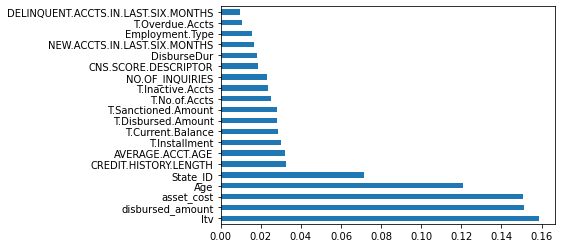

In [193]:
feat_importances = pd.Series(fs2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [194]:
feat_importances.nlargest(20)

ltv                                    0.158932
disbursed_amount                       0.151380
asset_cost                             0.150578
Age                                    0.120909
State_ID                               0.071602
CREDIT.HISTORY.LENGTH                  0.032855
AVERAGE.ACCT.AGE                       0.032043
T.Installment                          0.029883
T.Current.Balance                      0.028464
T.Disbursed.Amount                     0.028234
T.Sanctioned.Amount                    0.028206
T.No.of.Accts                          0.025312
T.Inactive.Accts                       0.023776
NO.OF_INQUIRIES                        0.023333
CNS.SCORE.DESCRIPTOR                   0.018755
DisburseDur                            0.018073
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.016421
Employment.Type                        0.015459
T.Overdue.Accts                        0.010528
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.009830
dtype: float64

In [195]:
final_iv, IV = data_vars(X_train,y_train)
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
20,ltv,0.059937
19,disbursed_amount,0.057580
2,CNS.SCORE.DESCRIPTOR,0.049136
9,State_ID,0.017234
16,T.Sanctioned.Amount,0.016868
15,T.Overdue.Accts,0.012540
12,T.Inactive.Accts,0.011234
17,VoterID_flag,0.011097
3,CREDIT.HISTORY.LENGTH,0.009758
8,NO.OF_INQUIRIES,0.009107


In [196]:
#Check Chi _Square
featurecheck=X_train
cols=['Feature','chiSquare','pvalue','dof']
lst=[]
for i in featurecheck:
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],y_train))
    lst.append([i,chi_sq,p_value,deg_freedom])

In [197]:
chi_square=pd.DataFrame(lst,columns=cols)
chi_square.sort_values(by='pvalue', ascending=False)

,Feature,chiSquare,pvalue,dof
18,T.Sanctioned.Amount,30134.228723,1.000000e+00,33270
17,T.Disbursed.Amount,32435.927598,1.000000e+00,36236
16,T.Current.Balance,50372.443932,1.000000e+00,53035
19,T.Installment,23081.490391,9.999982e-01,24085
2,ltv,7252.256944,2.840890e-16,6300
10,AVERAGE.ACCT.AGE,391.495063,3.174308e-17,183
1,asset_cost,42844.926048,1.748603e-19,40252
11,CREDIT.HISTORY.LENGTH,614.720919,3.753752e-27,280
8,NEW.ACCTS.IN.LAST.SIX.MONTHS,204.578356,4.472705e-31,23
4,Employment.Type,142.115749,1.380248e-31,2


In [ ]:
# Base opn Select K best, Feature importance and Information value, none of the lower features are consistently bottom ranked,  so we will keep all the 20 features for now.  now we are ready to start our modeling

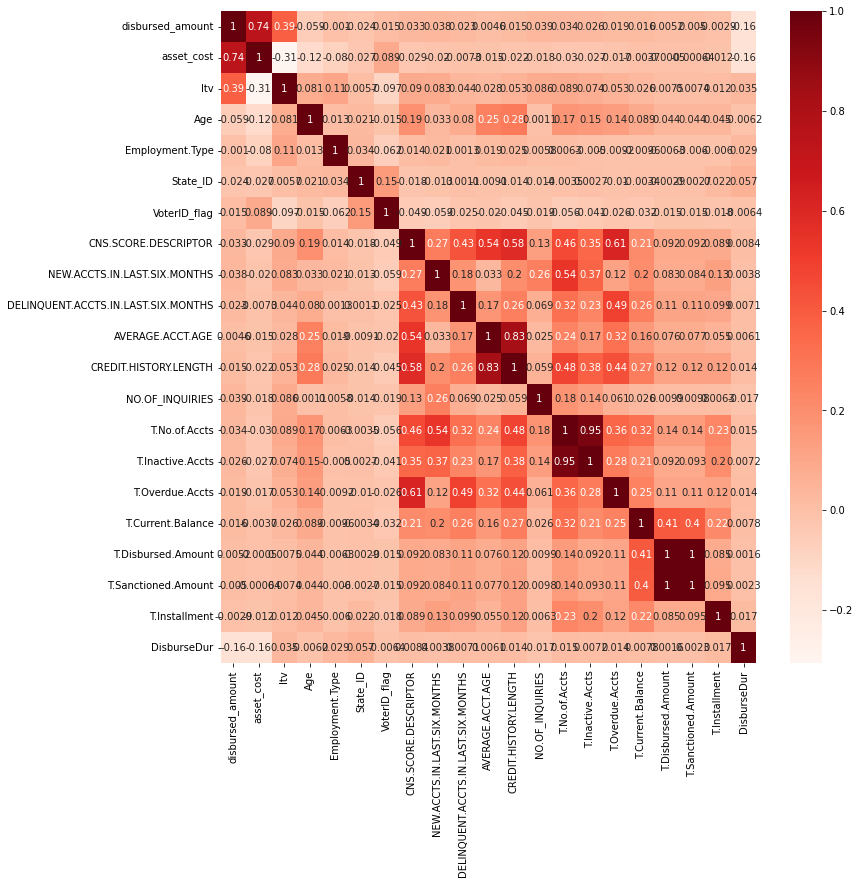

In [198]:
plt.figure(figsize=(12,12))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [199]:
#looks like Total Disbused Amount, Total Sanctioned AMount and T.No.fo Accts and Total.Inactive acconts, are closely correlated. We can drop one of each. Will drop T.Inactive accts, and T.Sanction amont.
X_train=X_train.drop(columns=['T.Sanctioned.Amount','T.Inactive.Accts'],axis=1)
X_train.head()

,disbursed_amount,asset_cost,ltv,Age,Employment.Type,State_ID,VoterID_flag,CNS.SCORE.DESCRIPTOR,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,T.No.of.Accts,T.Overdue.Accts,T.Current.Balance,T.Disbursed.Amount,T.Installment,DisburseDur
202181,0.177469,-0.098078,0.316278,-1.030081,-0.702893,-0.058507,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,0.156027
110124,-0.204605,-0.415158,0.278745,-0.826124,-0.702893,-0.727819,-0.411719,0.033298,-0.399782,-0.253566,-0.325410,-0.358712,-0.29245,0.472666,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126
136653,-2.002654,0.106358,-3.251968,1.111471,1.114044,0.164596,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,0.156027
132533,-0.235443,-0.547121,0.405309,0.091684,1.114044,-0.281611,2.428842,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126
156531,-0.081256,-0.548124,0.806824,0.091684,1.114044,2.395634,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126


In [200]:
X_test=X_test.drop(columns=['T.Sanctioned.Amount','T.Inactive.Accts'],axis=1)
X_test.head()

,disbursed_amount,asset_cost,ltv,Age,Employment.Type,State_ID,VoterID_flag,CNS.SCORE.DESCRIPTOR,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,T.No.of.Accts,T.Overdue.Accts,T.Current.Balance,T.Disbursed.Amount,T.Installment,DisburseDur
85130,0.528553,0.693329,-0.345349,-0.418209,1.114044,-0.727819,-0.411719,1.451028,-0.399782,4.948831,0.137971,0.271073,-0.29245,0.850757,-0.290193,-0.164604,-0.062951,-0.066549,0.156027
17125,-0.601944,-0.462665,-0.279885,0.091684,-2.519830,1.503219,-0.411719,0.033298,-0.399782,-0.253566,1.130928,0.341049,-0.29245,-0.283514,-0.290193,-0.091987,-0.009848,-0.085383,0.156027
31549,0.127667,-0.560212,1.234525,0.091684,1.114044,-0.950922,2.428842,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,1.354180
219801,1.803522,1.575579,-0.001443,0.601578,-0.702893,-0.504715,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126
132455,0.377912,0.366061,-0.199582,-0.214252,-0.702893,-0.281611,2.428842,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126


In [201]:
#Model building- LOgistic Regression

# for training set most response is 0, we use supersampling on training set to make the response more balanced
from collections import Counter
train_data=pd.concat([X_train,y_train],axis=1)
train_data.head()


,disbursed_amount,asset_cost,ltv,Age,Employment.Type,State_ID,VoterID_flag,CNS.SCORE.DESCRIPTOR,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,T.No.of.Accts,T.Overdue.Accts,T.Current.Balance,T.Disbursed.Amount,T.Installment,DisburseDur,loan_default
202181,0.177469,-0.098078,0.316278,-1.030081,-0.702893,-0.058507,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,0.156027,0
110124,-0.204605,-0.415158,0.278745,-0.826124,-0.702893,-0.727819,-0.411719,0.033298,-0.399782,-0.253566,-0.325410,-0.358712,-0.29245,0.472666,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126,0
136653,-2.002654,0.106358,-3.251968,1.111471,1.114044,0.164596,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,0.156027,0
132533,-0.235443,-0.547121,0.405309,0.091684,1.114044,-0.281611,2.428842,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126,0
156531,-0.081256,-0.548124,0.806824,0.091684,1.114044,2.395634,-0.411719,-0.675567,-0.399782,-0.253566,-0.590198,-0.568640,-0.29245,-0.472559,-0.290193,-0.178324,-0.093683,-0.085383,-1.042126,0


In [202]:
print(Counter(train_data["loan_default"]))

Counter({0: 127813, 1: 35394})


In [203]:
#using Adasync to build a more balanced training set

from imblearn.over_sampling import ADASYN

In [204]:

oversample = ADASYN()
Xsample, ysample = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(ysample)
print(counter)

Counter({1: 132507, 0: 127813})


In [205]:
#  More balance data set
#DO Logistic regression model#

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import classification_report

lsm = LogisticRegression(solver='liblinear').fit(Xsample, ysample)
lsm_predict = lsm.predict(X_test)
# predict probabilities
lsm_predict_prob = lsm.predict_proba(X_test)
lsm_predict_prob = lsm_predict_prob[:, 1]
roc_auc_score(y_test,lsm_predict_prob)

0.6244252508755096

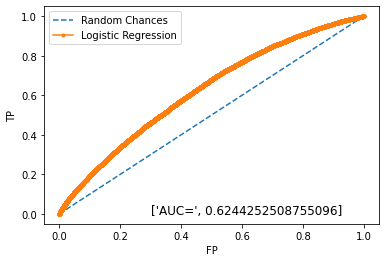

In [206]:
#ROC score is 62.4%
fpr, tpr, thresholds = roc_curve(y_test,lsm_predict_prob)
# plot roc curve
pyplot.plot([0,1], [0,1], linestyle='--', label='Random Chances')
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')

pyplot.xlabel('FP')
pyplot.ylabel('TP')
pyplot.legend()
plt.text(0.3, 0, ["AUC=",roc_auc_score(y_test,lsm_predict_prob)], fontsize=12)
pyplot.show()

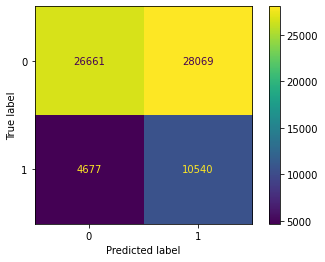

In [207]:
# Display Confussion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
cm = confusion_matrix(y_test, lsm_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

Logistic: f1=0.392 auc=0.304


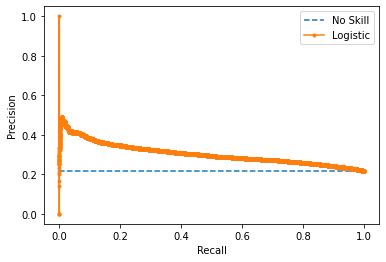

In [208]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lsm_predict_prob)
lr_f1, lr_auc = f1_score(y_test, lsm_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [209]:
from sklearn.metrics import classification_report
print(classification_report(lsm_predict, y_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.85      0.62     31338
           1       0.69      0.27      0.39     38609

    accuracy                           0.53     69947
   macro avg       0.59      0.56      0.51     69947
weighted avg       0.60      0.53      0.49     69947



In [150]:
#automate the rest of the modelling with a function

In [181]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(Xsample, ysample)
    pred = model.predict(X_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    #ROC Plot
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
    plt.plot([0,1], [0,1], linestyle='--', label='Random Chances')
    plt.plot(fpr, tpr, marker='.', label=model_name)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Confusion matrix
    print('confusion_matrix')
    cm=confusion_matrix(y_test, pred)
    cmdisp= ConfusionMatrixDisplay(confusion_matrix=cm)
    cmdisp.plot() 
    
       
   

Logistic Regression
accuracy_score 53.18455401947189
precision_score 27.299334352094075
recall_score 69.26463823355458
f1_score 39.16322966596069
roc_auc_score 58.98916179903565


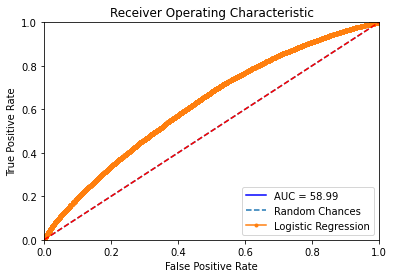

confusion_matrix


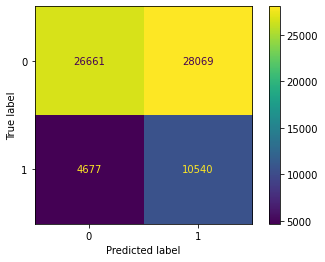

In [210]:
#Doing Logistic Regression#
lr=LogisticRegression(solver='liblinear')
train_model(lr,"Logistic Regression")

In [ ]:
#try using other machine learning tools.

In [211]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Random Forest
accuracy_score 63.62817561868271
precision_score 29.6529215093138
recall_score 48.958401787474536
f1_score 36.93512803351429
roc_auc_score 58.332663345774534


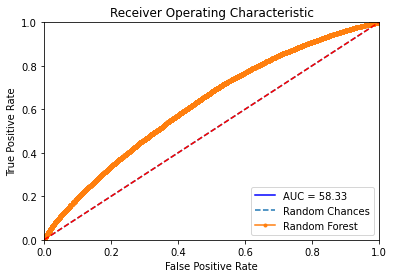

confusion_matrix


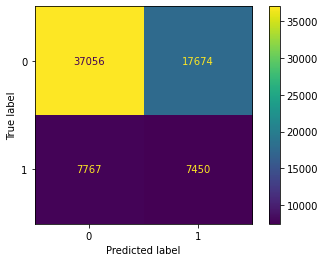

In [212]:
#Random Forest
rfc = RandomForestClassifier(n_estimators = 1500, n_jobs=-1, max_depth=15, 
                             min_samples_split=5, min_samples_leaf=3)

train_model(rfc, 'Random Forest')

Decision Tree
accuracy_score 58.83168684861395
precision_score 26.447427758698446
recall_score 50.10185976210817
f1_score 34.619925529016434
roc_auc_score 55.680383562764305


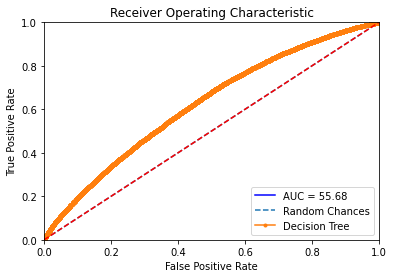

confusion_matrix


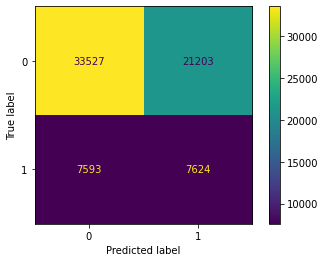

In [213]:
#Decision Tree
dtc = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=25, min_samples_split=4,
                            min_samples_leaf=2)

train_model(dtc, 'Decision Tree')

GradientBoostingClassifier
accuracy_score 70.44047636067307
precision_score 28.200622953438227
recall_score 23.20431096799632
f1_score 25.459658230586196
roc_auc_score 53.389109622496235


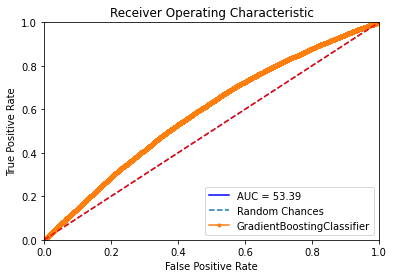

confusion_matrix


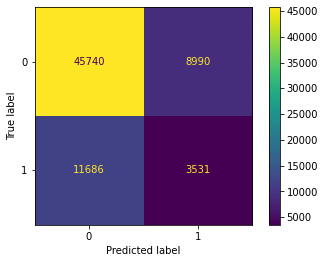

In [185]:
#Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=1000, min_samples_split=5, max_depth=15)

train_model(gbc, 'GradientBoostingClassifier')

XGBClassifier


C:\Users\thlin\Anaconda3\envs\R tutorial\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 70.06590704390467
precision_score 28.718101331746148
recall_score 25.36636656371164
f1_score 26.938376718542816
roc_auc_score 53.930214160715686


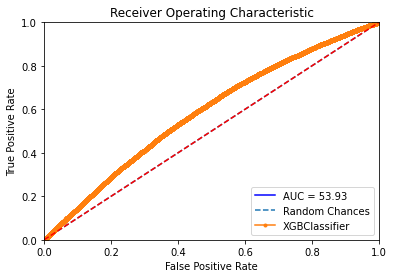

confusion_matrix


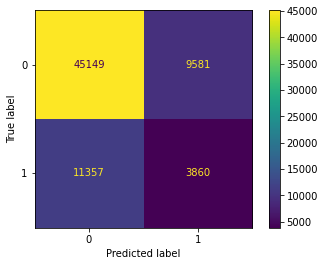

In [186]:
#XGB
xgb = XGBClassifier(n_estimators = 1500, nthread  = 4, max_depth = 15, min_child_weight = 5, learning_rate=0.1)

train_model(xgb, 'XGBClassifier')

In [ ]:
#break below is my old code for another project on credit that I have done

In [159]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    cm=confusion_matrix(y_test, pred)
    cmdisp= ConfusionMatrixDisplay(confusion_matrix=cm)
    cmdisp.plot() 
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
                    
    pyplot.plot([0,1], [0,1], linestyle='--', label='Random Chances')
    pyplot.plot(fpr, tpr, marker='.', label=model_name)
    pyplot.xlabel('FP')
    pyplot.ylabel('TP')
    pyplot.legend()
    plt.text(0.3, 0, ["AUC=",roc_score],fontsize=12)
    pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

In [ ]:
df['loan_status'].value_counts()

In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
Feature.shape

In [ ]:
X = Feature
X[0:5]

In [ ]:
y = df['loan_status'].values
y[0:5]

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
X.shape

In [ ]:
#classification
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
loantesttree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loantesttree.fit(X_train,y_train)
predTree = loantesttree.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

In [ ]:
print("Avg F1-score: %.4f" % f1_score(y_test, predTree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, predTree))

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat2 = clf.predict(X_test)
yhat2 [0:5]

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat2, average='weighted')
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat2)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

In [ ]:
#model evaluation
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)
Xtest1 = Feature1
ytest1 = test_df['loan_status'].values
Xtest1= preprocessing.StandardScaler().fit(Xtest1).transform(Xtest1)
Xtest1.shape

In [ ]:
#KNN
yhat4 = neigh.predict(Xtest1)
yhat4[0:5]
print("Avg F1-score for KNN: %.4f" % f1_score(ytest1, yhat4, average='weighted'))
print("Jaccard score for KNN: %.4f" % jaccard_similarity_score(ytest1, yhat4))

In [ ]:
predTree1 = loantesttree.predict(Xtest1)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(ytest1, predTree1))
print("Avg F1-score for Decision Tree: %.4f" % f1_score(ytest1, predTree1, average='weighted'))
print("Jaccard score for Decision Tree: %.4f" % jaccard_similarity_score(ytest1, predTree1))

In [ ]:
yhat5 = clf.predict(Xtest1)
f1_score(ytest1, yhat5, average='weighted')
jaccard_similarity_score(ytest1, yhat5)
print("Avg F1-score for SVM: %.4f" % f1_score(ytest1, yhat5, average='weighted'))
print("Jaccard score for SVM: %.4f" % jaccard_similarity_score(ytest1, yhat5))